In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv("Apple.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899490,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])

shape is =(251, 1)
[[130.279999]
 [126.889999]
 [127.129997]
 [126.010002]
 [130.470001]]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[-2.40404127e+00],
       [-2.59791548e+00],
       [-2.58418999e+00],
       [-2.64824254e+00],
       [-2.39317504e+00],
       [-2.40518530e+00],
       [-2.34856688e+00],
       [-2.19815680e+00],
       [-2.30395871e+00],
       [-2.14382644e+00],
       [-2.03001799e+00],
       [-2.18671897e+00],
       [-2.11809110e+00],
       [-1.95567163e+00],
       [-1.83042528e+00],
       [-1.79725501e+00],
       [-1.66686179e+00],
       [-1.66743334e+00],
       [-1.56449111e+00],
       [-1.69374116e+00],
       [-1.62110959e+00],
       [-1.33916312e+00],
       [-1.38891816e+00],
       [-1.12927495e+00],
       [-1.23965218e+00],
       [-1.05435612e+00],
       [-1.06007547e+00],
       [-1.30713596e+00],
       [-1.22192338e+00],
       [-1.15501115e+00],
       [-1.09839268e+00],
       [-1.07551701e+00],
       [-1.14185682e+00],
       [-1.26481590e+00],
       [-1.34087876e+00],
       [-1.27110687e+00],
       [-1.44153288e+00],
       [-1.40721852e+00],
       [-1.4

In [5]:
X_train = []
Y_train = []
for i in range(50,250):
    X_train.append(scaled_training_set[i-50:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(200, 50)
(200,)


In [6]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(200, 50, 1)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1))

In [9]:
from keras.optimizers import RMSprop
regressor.compile(optimizer=RMSprop(), loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 200, batch_size = 16)

Epoch 1/200

13/13 [==============================] - 5s 48ms/step - loss: 0.2381
Epoch 2/200
13/13 [==============================] - 1s 48ms/step - loss: 0.1287
Epoch 3/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1386
Epoch 4/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1374
Epoch 5/200
13/13 [==============================] - 1s 51ms/step - loss: 0.1077
Epoch 6/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1272
Epoch 7/200
13/13 [==============================] - 1s 47ms/step - loss: 0.1033
Epoch 8/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0932
Epoch 9/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0785
Epoch 10/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0842
Epoch 11/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0820
Epoch 12/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0709
Epoch 13/200
13/13 [====

13/13 [==============================] - 1s 48ms/step - loss: 0.0179
Epoch 197/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0181
Epoch 198/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0203
Epoch 199/200
13/13 [==============================] - 1s 47ms/step - loss: 0.0184
Epoch 200/200
13/13 [==============================] - 1s 46ms/step - loss: 0.0201


In [14]:
dataset_test = pd.read_csv("Apple.csv")
predicted_stock_price = dataset_test.iloc[:,1:2].values

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(50, 70):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
Y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 66ms/step


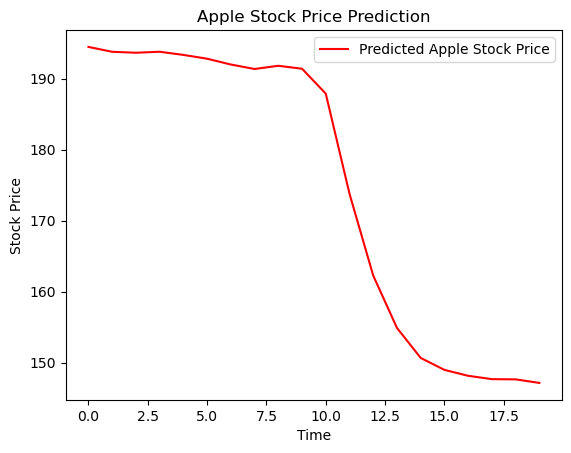

In [17]:
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()